# MLP Implementation
---

In this module, we will utilize the [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) module from sci-kit learn. This will allow us to rapidly develop a model and use the built in model metrics to develop and compare our model quickly and easily.

This project will follow the 4 phase process of a typical machine learning project.

Phase 1: Data Cleaning/Analysis

Phase 2: Train the model

Phase 3: Test the model

Phase 4: Compare the results

---
# Phase 1 - Data Cleaning/Analysis


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data_df = pd.read_csv('diabetes_data_upload.csv')

data_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


Above is a snippet of our un-modified data as a pandas dataframe. This data is not in a useful format and needs to be changed to be used in a machine learning model. We will start by encoding each feature with a 0 or 1 instead of a string to represent postive/negative, male/female, etc. We will also standardize the age value to provide a more consistent value range with the rest of the features. In this module, we will use scikit-learn's standardscalar function to cleanly and easily standardize the values. Finally, we need to append a column of ones to act as the bias of our model.

In [8]:
data_df = data_df.replace(['Male', 'Yes', 'Positive'], 1)
data_df = data_df.replace(['Female', 'No', 'Negative'], 0)
data_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [9]:
scaler = StandardScaler()
data_df[['Age']] = scaler.fit_transform(data_df[['Age']])
data_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,-0.661367,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.821362,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,-0.578993,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,-0.249498,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.986110,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


Above is the results of our cleaning. The data is now useful, the bias is now a part of our features, and the age feature is normalized. 

---
Next, we need to shuffle and split the data, train and test our model, then view the metrics. Using sci-kit learn, this process becomes incredible simple. The [scikit-learn website](https://scikit-learn.org/stable/) provides a model, a data shuffle and split method, and convenient methods to display the confusion matrix and f score. 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data_df.iloc[:,:-1], data_df.iloc[:,-1], test_size = int(data_df.shape[0]*0.1), train_size = int(data_df.shape[0]*0.9), random_state=42)
print(X_train.shape)
print(X_test.shape)

(468, 16)
(52, 16)


# Phase 2&3: Train and Test the model
In this phase, we need to prepare the data for the training instance and train the model.  Next, we will create a MLP model using sci-kit learn's MLP module and fit the data to the model. Here, we create, train, and test models using all avaliable activation functions provided by sci-kit learn to judge how well each performs with this dataset. We have chosen a hidden layer size of 500 to provide the model flexibility.

Model F1 Score for identity: 0.94
Model F1 Score for logistic: 0.94
Model F1 Score for tanh: 1.0
Model F1 Score for relu: 1.0


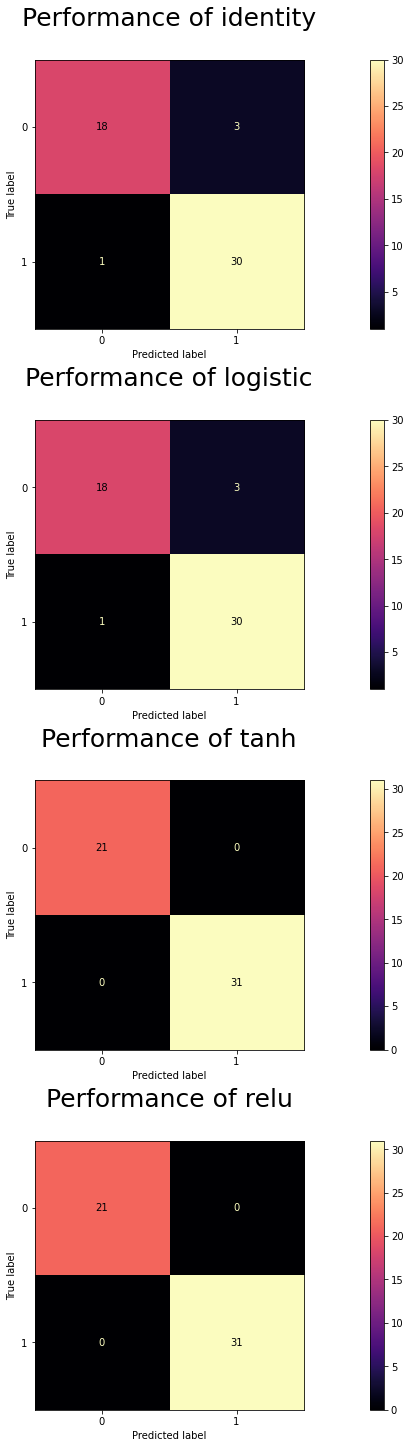

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(4,1, figsize = (20,20), constrained_layout = True)
pred = []
activation_list =['identity', 'logistic', 'tanh', 'relu']
for activation in activation_list:
    mlp = MLPClassifier(500, activation= activation, max_iter= 1000)
    mlp.fit(X_train, y_train)
    y_hat = mlp.predict(X_test)
    pred.append(y_hat)

    print(f"Model F1 Score for {activation}: {np.round(f1_score(y_test, y_hat),2)}")

labels = ['test1', 'test2']
displabels = ['Negative', 'Positive']

for i, axis in enumerate(ax.flat):
    axis.set_title('Performance of ' + str(activation_list[i])+'\n', fontsize = 25)
    ConfusionMatrixDisplay.from_predictions(y_test, pred[i], cmap = 'magma',ax=axis)


All activation functions perform well, however the Tanh and ReLU functions perform the best with an F1 score of 100. Every prediction made against the test set was correct. 

## Phase 4: Model Comparison

The scores for classification models are below:
- Perceptron: .94
- MLP: 1 (Tanh, ReLU)
- Logistic Regression: .95
- Decision Tree: .99
- KNN: .97
- SVM: .93

The best performing model is the MLP with a F score of 1 and no misslabeled classificatinos. The decision tree, however has and F score of .99 with 1 mislabeled classification. While technically worse, the decision tree model comes very close and is much more intuitive. This is where the application and client are important considerations in model selection. For example, in a medical scenario a doctor may want to understand every aspect of how a decision about a patient was made. Unless a tool is extensively tested with 100% accuracy at every stage, it is hard to overcome ones own intuition, especially if the responsibility of a life lays on the decision maker. The ability to understand a model vs the accuracy and recall of a model are important considerations and the impact to the client must be considered.

